In [19]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


In [20]:
ticker = "WEGE3.SA"
hold_days_period = 3 

[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

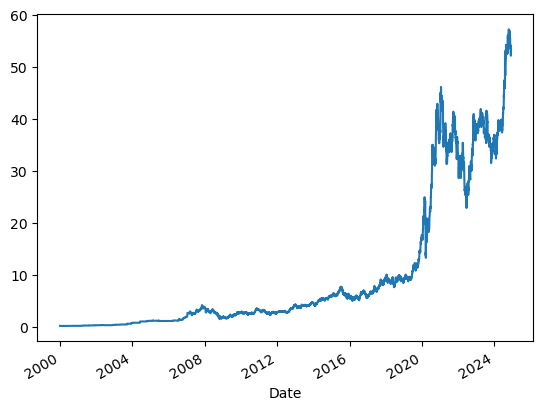

In [21]:
dados = yf.download(ticker)

dados["Close"].plot()

In [22]:
dados["retorno"] = dados["Adj Close"].pct_change()

In [23]:
dados["all_time_high"] = dados["Close"].cummax()

In [24]:
dados["all_time_high_short_stop"] = dados['all_time_high'].shift(hold_days_period)
dados["all_time_high_buy_signal"] = dados["all_time_high"].shift(1)

In [25]:
dados["signals"] = 0

In [26]:
dados['signals'] = (dados['all_time_high'] != dados["all_time_high_buy_signal"]).astype(int)

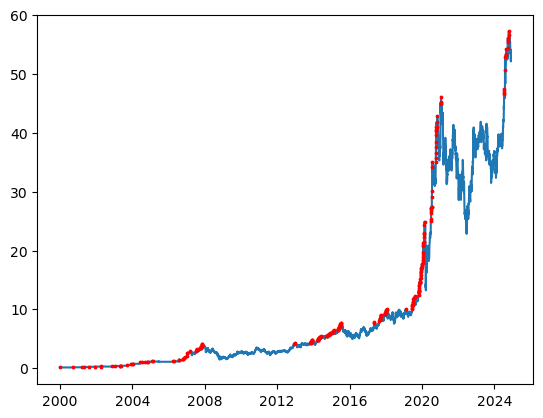

In [27]:
all_time_high_days = dados[dados["signals"] ==1]['Close']

fig, ax = plt.subplots()

ax.scatter(all_time_high_days.index, all_time_high_days.values, color = "red", s = 3, zorder = 2)
ax.plot(dados.index, dados['Close'].values, zorder = 1)

In [28]:
dados['signals'] = np.where(dados["signals"] ==0, np.where(dados["all_time_high"] != dados["all_time_high_short_stop"], 1, 0), 
                            dados['signals'])
dados

,Open,High,Low,Close,Adj Close,Volume,retorno,all_time_high,all_time_high_short_stop,all_time_high_buy_signal,signals
Date,,,,,,,,,,,
2000-01-03,0.168639,0.170118,0.168639,0.168639,0.119891,378560,NaN,0.168639,NaN,NaN,1
2000-01-04,0.164201,0.164201,0.162721,0.162721,0.115684,47320,-0.035092,0.168639,NaN,0.168639,1
2000-01-05,0.162721,0.162721,0.162721,0.162721,0.115684,0,0.000000,0.168639,NaN,0.168639,1
2000-01-06,0.147928,0.147928,0.147928,0.147928,0.105167,250120,-0.090911,0.168639,0.168639,0.168639,0
2000-01-07,0.149408,0.149408,0.147928,0.147928,0.105167,135200,0.000000,0.168639,0.168639,0.168639,0
...,...,...,...,...,...,...,...,...,...,...,...
2024-11-22,53.950001,54.250000,53.630001,54.009998,54.009998,5034900,0.005211,57.189999,57.189999,57.189999,0
2024-11-25,54.020000,54.209999,52.080002,52.150002,52.150002,12443900,-0.034438,57.189999,57.189999,57.189999,0
2024-11-26,52.160000,53.090000,52.029999,52.779999,52.779999,8886200,0.012080,57.189999,57.189999,57.189999,0


In [29]:
dados["trades"] = (dados['signals'] != dados["signals"].shift()).cumsum()
dados.head(25)

,Open,High,Low,Close,Adj Close,Volume,retorno,all_time_high,all_time_high_short_stop,all_time_high_buy_signal,signals,trades
Date,,,,,,,,,,,,
2000-01-03,0.168639,0.170118,0.168639,0.168639,0.119891,378560,NaN,0.168639,NaN,NaN,1,1
2000-01-04,0.164201,0.164201,0.162721,0.162721,0.115684,47320,-0.035092,0.168639,NaN,0.168639,1,1
2000-01-05,0.162721,0.162721,0.162721,0.162721,0.115684,0,0.000000,0.168639,NaN,0.168639,1,1
2000-01-06,0.147928,0.147928,0.147928,0.147928,0.105167,250120,-0.090911,0.168639,0.168639,0.168639,0,2
2000-01-07,0.149408,0.149408,0.147928,0.147928,0.105167,135200,0.000000,0.168639,0.168639,0.168639,0,2
2000-01-10,0.147928,0.147928,0.147928,0.147928,0.105167,0,0.000000,0.168639,0.168639,0.168639,0,2
2000-01-11,0.149408,0.149408,0.147928,0.147928,0.105167,1568320,0.000000,0.168639,0.168639,0.168639,0,2
2000-01-12,0.150887,0.150887,0.150887,0.150887,0.107271,2109120,0.020003,0.168639,0.168639,0.168639,0,2
2000-01-13,0.153846,0.162721,0.150887,0.153846,0.109374,1237080,0.019611,0.168639,0.168639,0.168639,0,2


In [30]:
dados["trades"] = dados['trades'].where(dados['signals'] ==1)

dados = dados.dropna(subset = "trades")
dados.head(20)


,Open,High,Low,Close,Adj Close,Volume,retorno,all_time_high,all_time_high_short_stop,all_time_high_buy_signal,signals,trades
Date,,,,,,,,,,,,
2000-01-03,0.168639,0.170118,0.168639,0.168639,0.119891,378560,NaN,0.168639,NaN,NaN,1,1.0
2000-01-04,0.164201,0.164201,0.162721,0.162721,0.115684,47320,-0.035092,0.168639,NaN,0.168639,1,1.0
2000-01-05,0.162721,0.162721,0.162721,0.162721,0.115684,0,0.000000,0.168639,NaN,0.168639,1,1.0
2000-09-28,0.174556,0.174556,0.174556,0.174556,0.124098,6760,0.044251,0.174556,0.168639,0.168639,1,3.0
2000-09-29,0.174556,0.174556,0.174556,0.174556,0.124098,0,0.000000,0.174556,0.168639,0.174556,1,3.0
2000-10-02,0.174556,0.174556,0.174556,0.174556,0.124098,0,0.000000,0.174556,0.168639,0.174556,1,3.0
2001-03-13,0.207100,0.207100,0.207100,0.207100,0.147234,13520,0.186439,0.207100,0.174556,0.174556,1,5.0
2001-03-14,0.207100,0.207100,0.207100,0.207100,0.147234,13520,0.000000,0.207100,0.174556,0.207100,1,5.0
2001-03-15,0.207100,0.207100,0.207100,0.207100,0.147234,0,0.000000,0.207100,0.174556,0.207100,1,5.0


In [31]:
dados["retorno_cota"] = 1 + dados["retorno"]

dados["rentabilidade_trades"] = dados.groupby("trades")["retorno_cota"].cumprod() - 1


C:\Users\joaof\AppData\Local\Temp\ipykernel_23892\3309274909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados["retorno_cota"] = 1 + dados["retorno"]
C:\Users\joaof\AppData\Local\Temp\ipykernel_23892\3309274909.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados["rentabilidade_trades"] = dados.groupby("trades")["retorno_cota"].cumprod() - 1


In [33]:
dados = dados.sort_index(ascending = False)

dados = dados.drop_duplicates("trades")

dados = dados.sort_index(ascending= True)

dados = dados[["trades", "rentabilidade_trades"]]

dados

,trades,rentabilidade_trades
Date,,
2000-01-05,1.0,-0.035092
2000-10-02,3.0,0.044251
2001-03-15,5.0,0.186439
2001-04-26,7.0,0.135717
2001-08-16,9.0,0.184210
...,...,...
2024-07-22,159.0,0.028117
2024-08-05,161.0,0.069442
2024-08-26,163.0,0.026186


In [35]:
rentabilidade_acumulada = ((1+ dados["rentabilidade_trades"]).cumprod()-1).iloc[-1]
trades_certos = (len(dados[dados["rentabilidade_trades"] > 0])) / len(dados["rentabilidade_trades"])
trades_errados = 1 - trades_certos
media_ganhos = dados[dados["rentabilidade_trades"] > 0]["rentabilidade_trades"].mean()
media_perdas = dados[dados["rentabilidade_trades"] <= 0]["rentabilidade_trades"].mean()

ev = (trades_certos * media_ganhos) - (trades_errados * abs(media_perdas))

In [36]:
print(f'''
Rentabilidade Acumulada: {rentabilidade_acumulada}
Trades Certos: {trades_certos}
EV: {ev}

''')


Rentabilidade Acumulada: 261.99025312728253
Trades Certos: 0.8928571428571429
EV: 0.0716066454643648




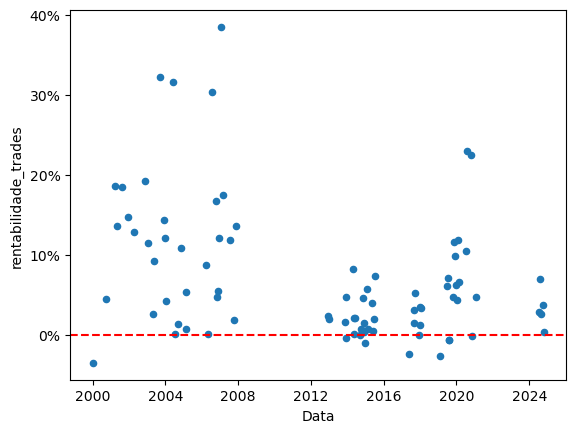

In [38]:
scatter = dados['rentabilidade_trades'].to_frame()
scatter = scatter.reset_index()
scatter.columns = ["Data", "rentabilidade_trades"]
ax = scatter.plot(x = "Data", y = "rentabilidade_trades", kind = "scatter")
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y*100:.0f}%'))
ax.axhline(y=0, color = "red", linestyle = '--')
